# Introduction
*Author: Samanyu*<br>
*Language: Python*<br>
*Accelerator: None*<br><br>
**If you liked this notebook or you found it helpful, kindly upvote :)**<br>
**Please provide feedback and suggestions to improve this notebook :)**

# Reading and Displaying the Data

In [1]:
#importing
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv(r'/kaggle/input/car-price-prediction/CarPrice_Assignment.csv')
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [4]:
# first let us check for null values, if there are none we will move ahead to drop dupliactes
df.isnull().any()

car_ID              False
symboling           False
CarName             False
fueltype            False
aspiration          False
doornumber          False
carbody             False
drivewheel          False
enginelocation      False
wheelbase           False
carlength           False
carwidth            False
carheight           False
curbweight          False
enginetype          False
cylindernumber      False
enginesize          False
fuelsystem          False
boreratio           False
stroke              False
compressionratio    False
horsepower          False
peakrpm             False
citympg             False
highwaympg          False
price               False
dtype: bool

In [5]:
# No null values :)
# going ahead and removing duplicate values

df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

# EDA

In [6]:
# importing
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)


In [7]:
# let us take a look at how our features are distributed using countplots and kde plots

cat_cols = df.columns[df.dtypes == 'object']
not_cat_cols = df.columns[df.dtypes != 'object']
print(len(cat_cols), len(not_cat_cols))

10 16


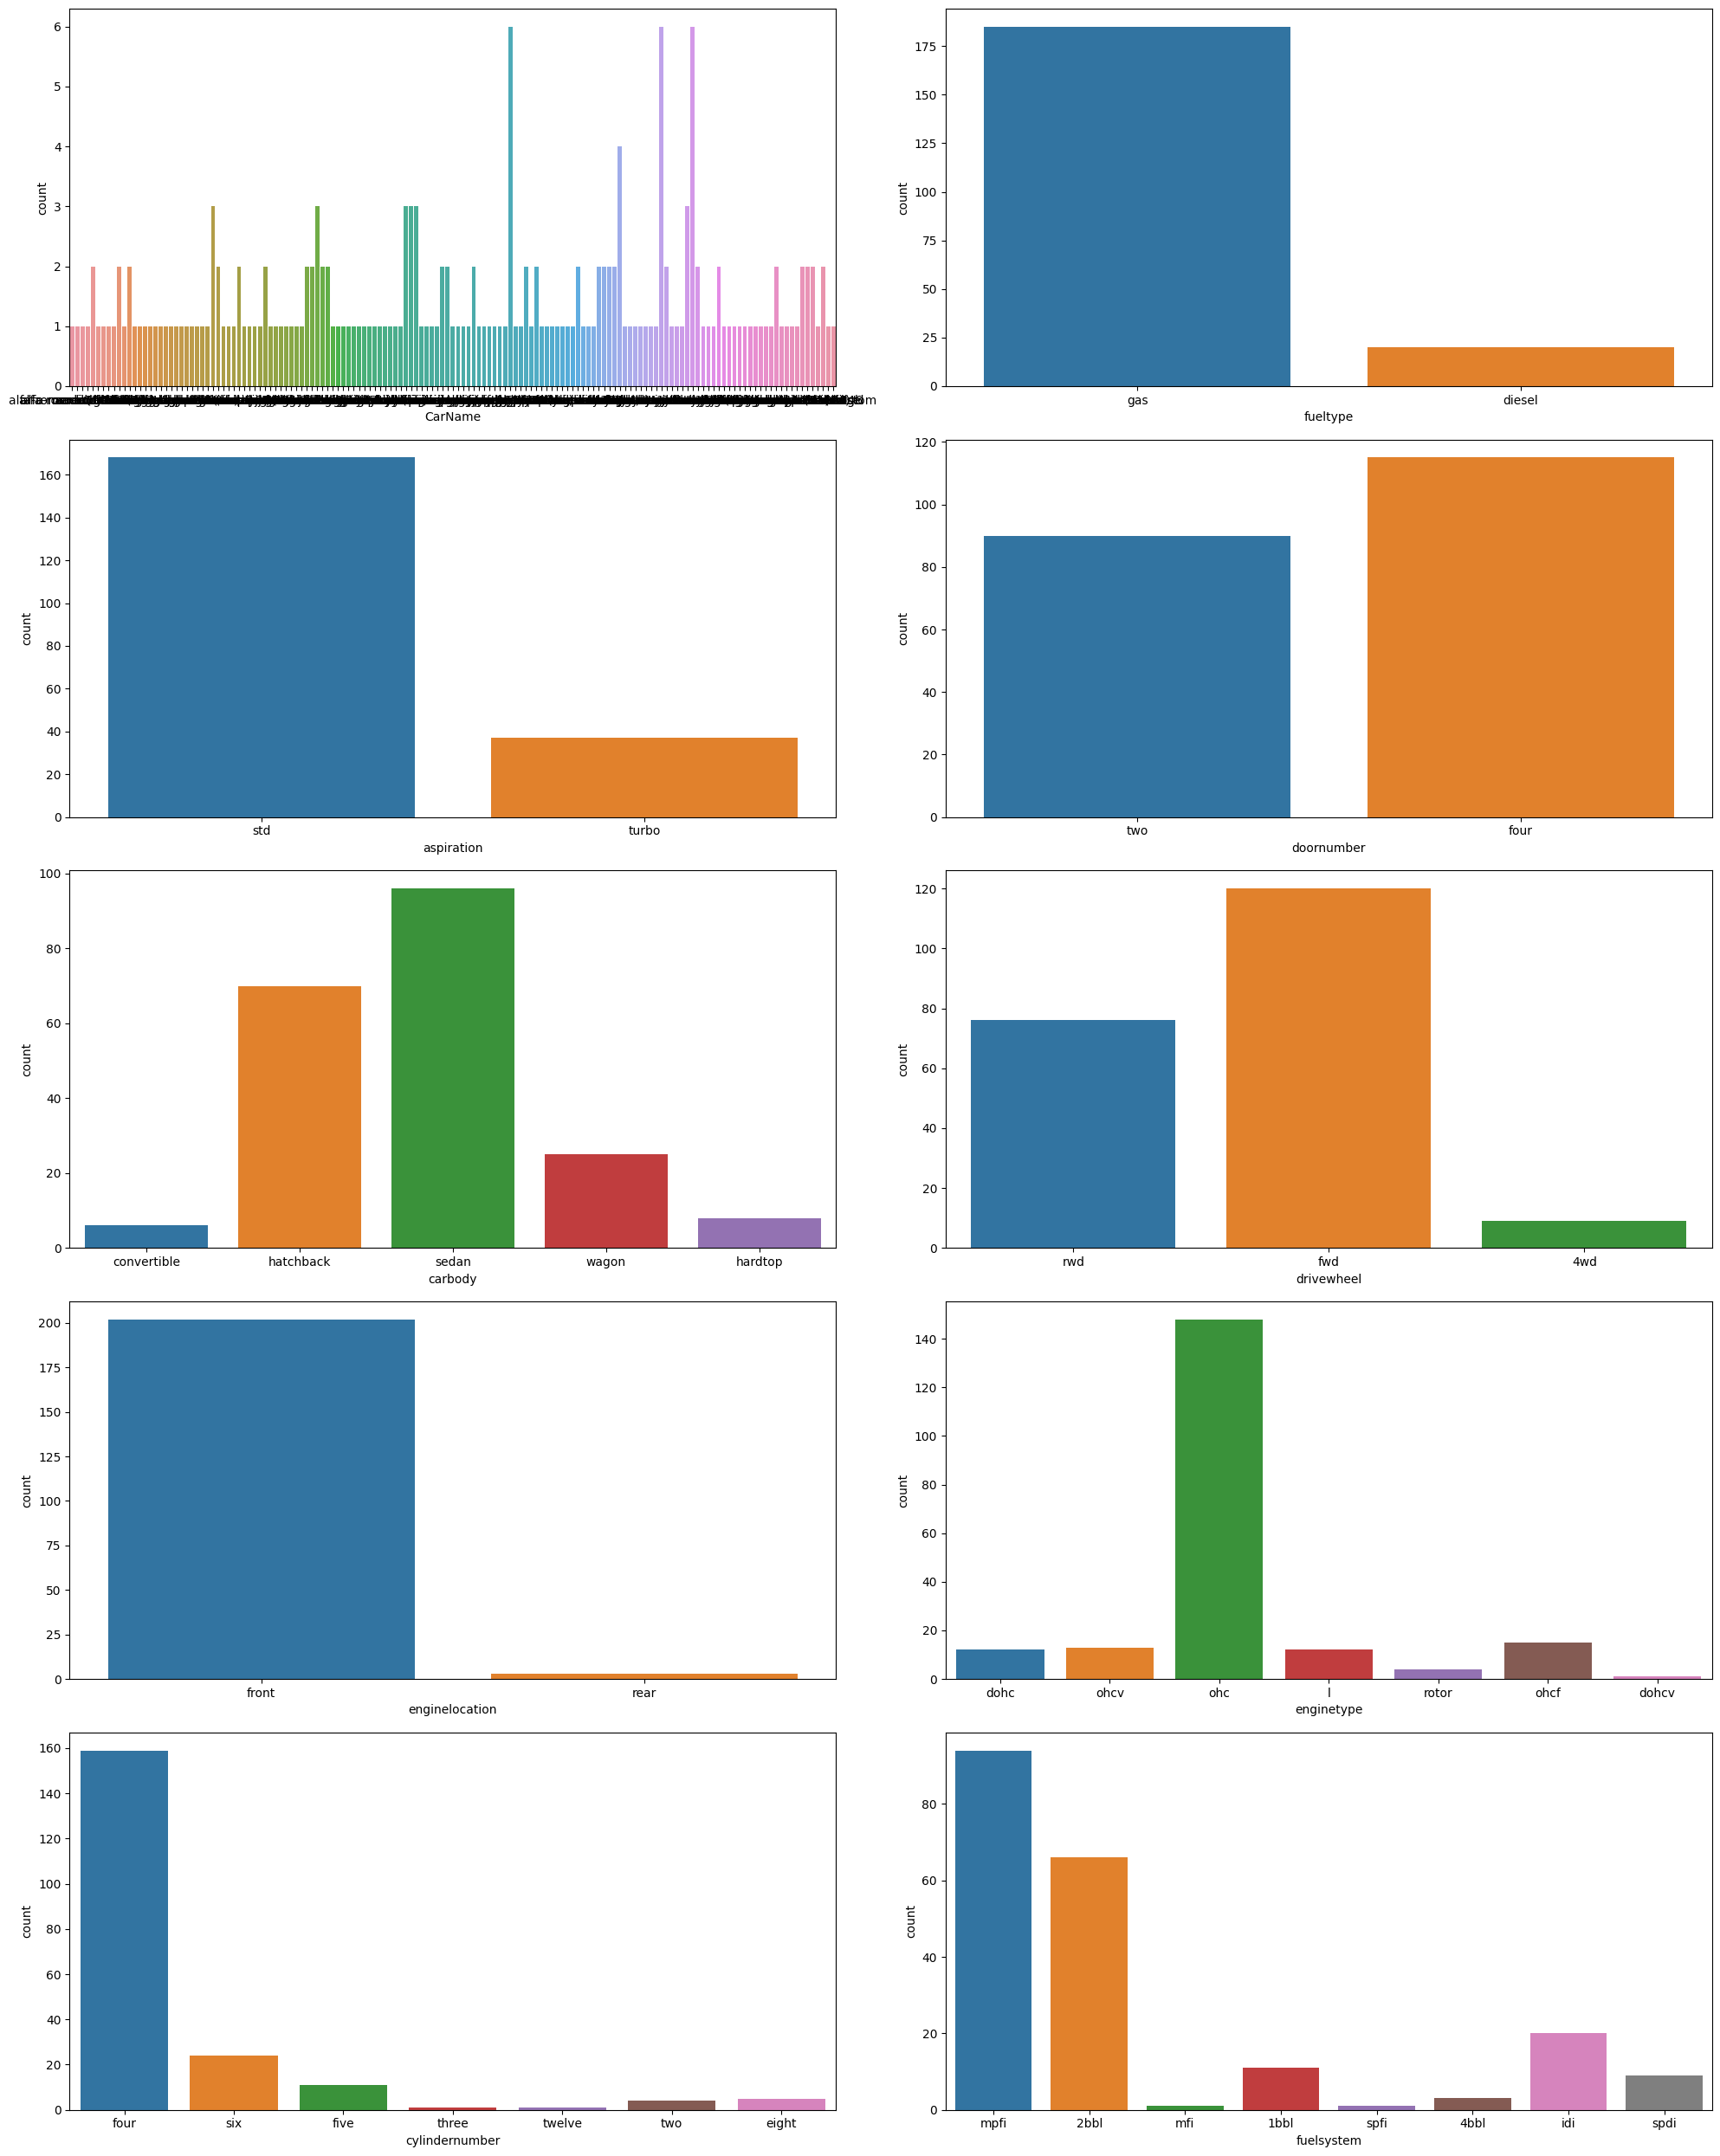

In [8]:
fig,ax=plt.subplots(5,2,figsize=(20,25))
ax=ax.flatten()
i=0
for col in cat_cols:
    sns.countplot(data=df,x=col,ax=ax[i])
    i+=1
plt.tight_layout()
plt.show()

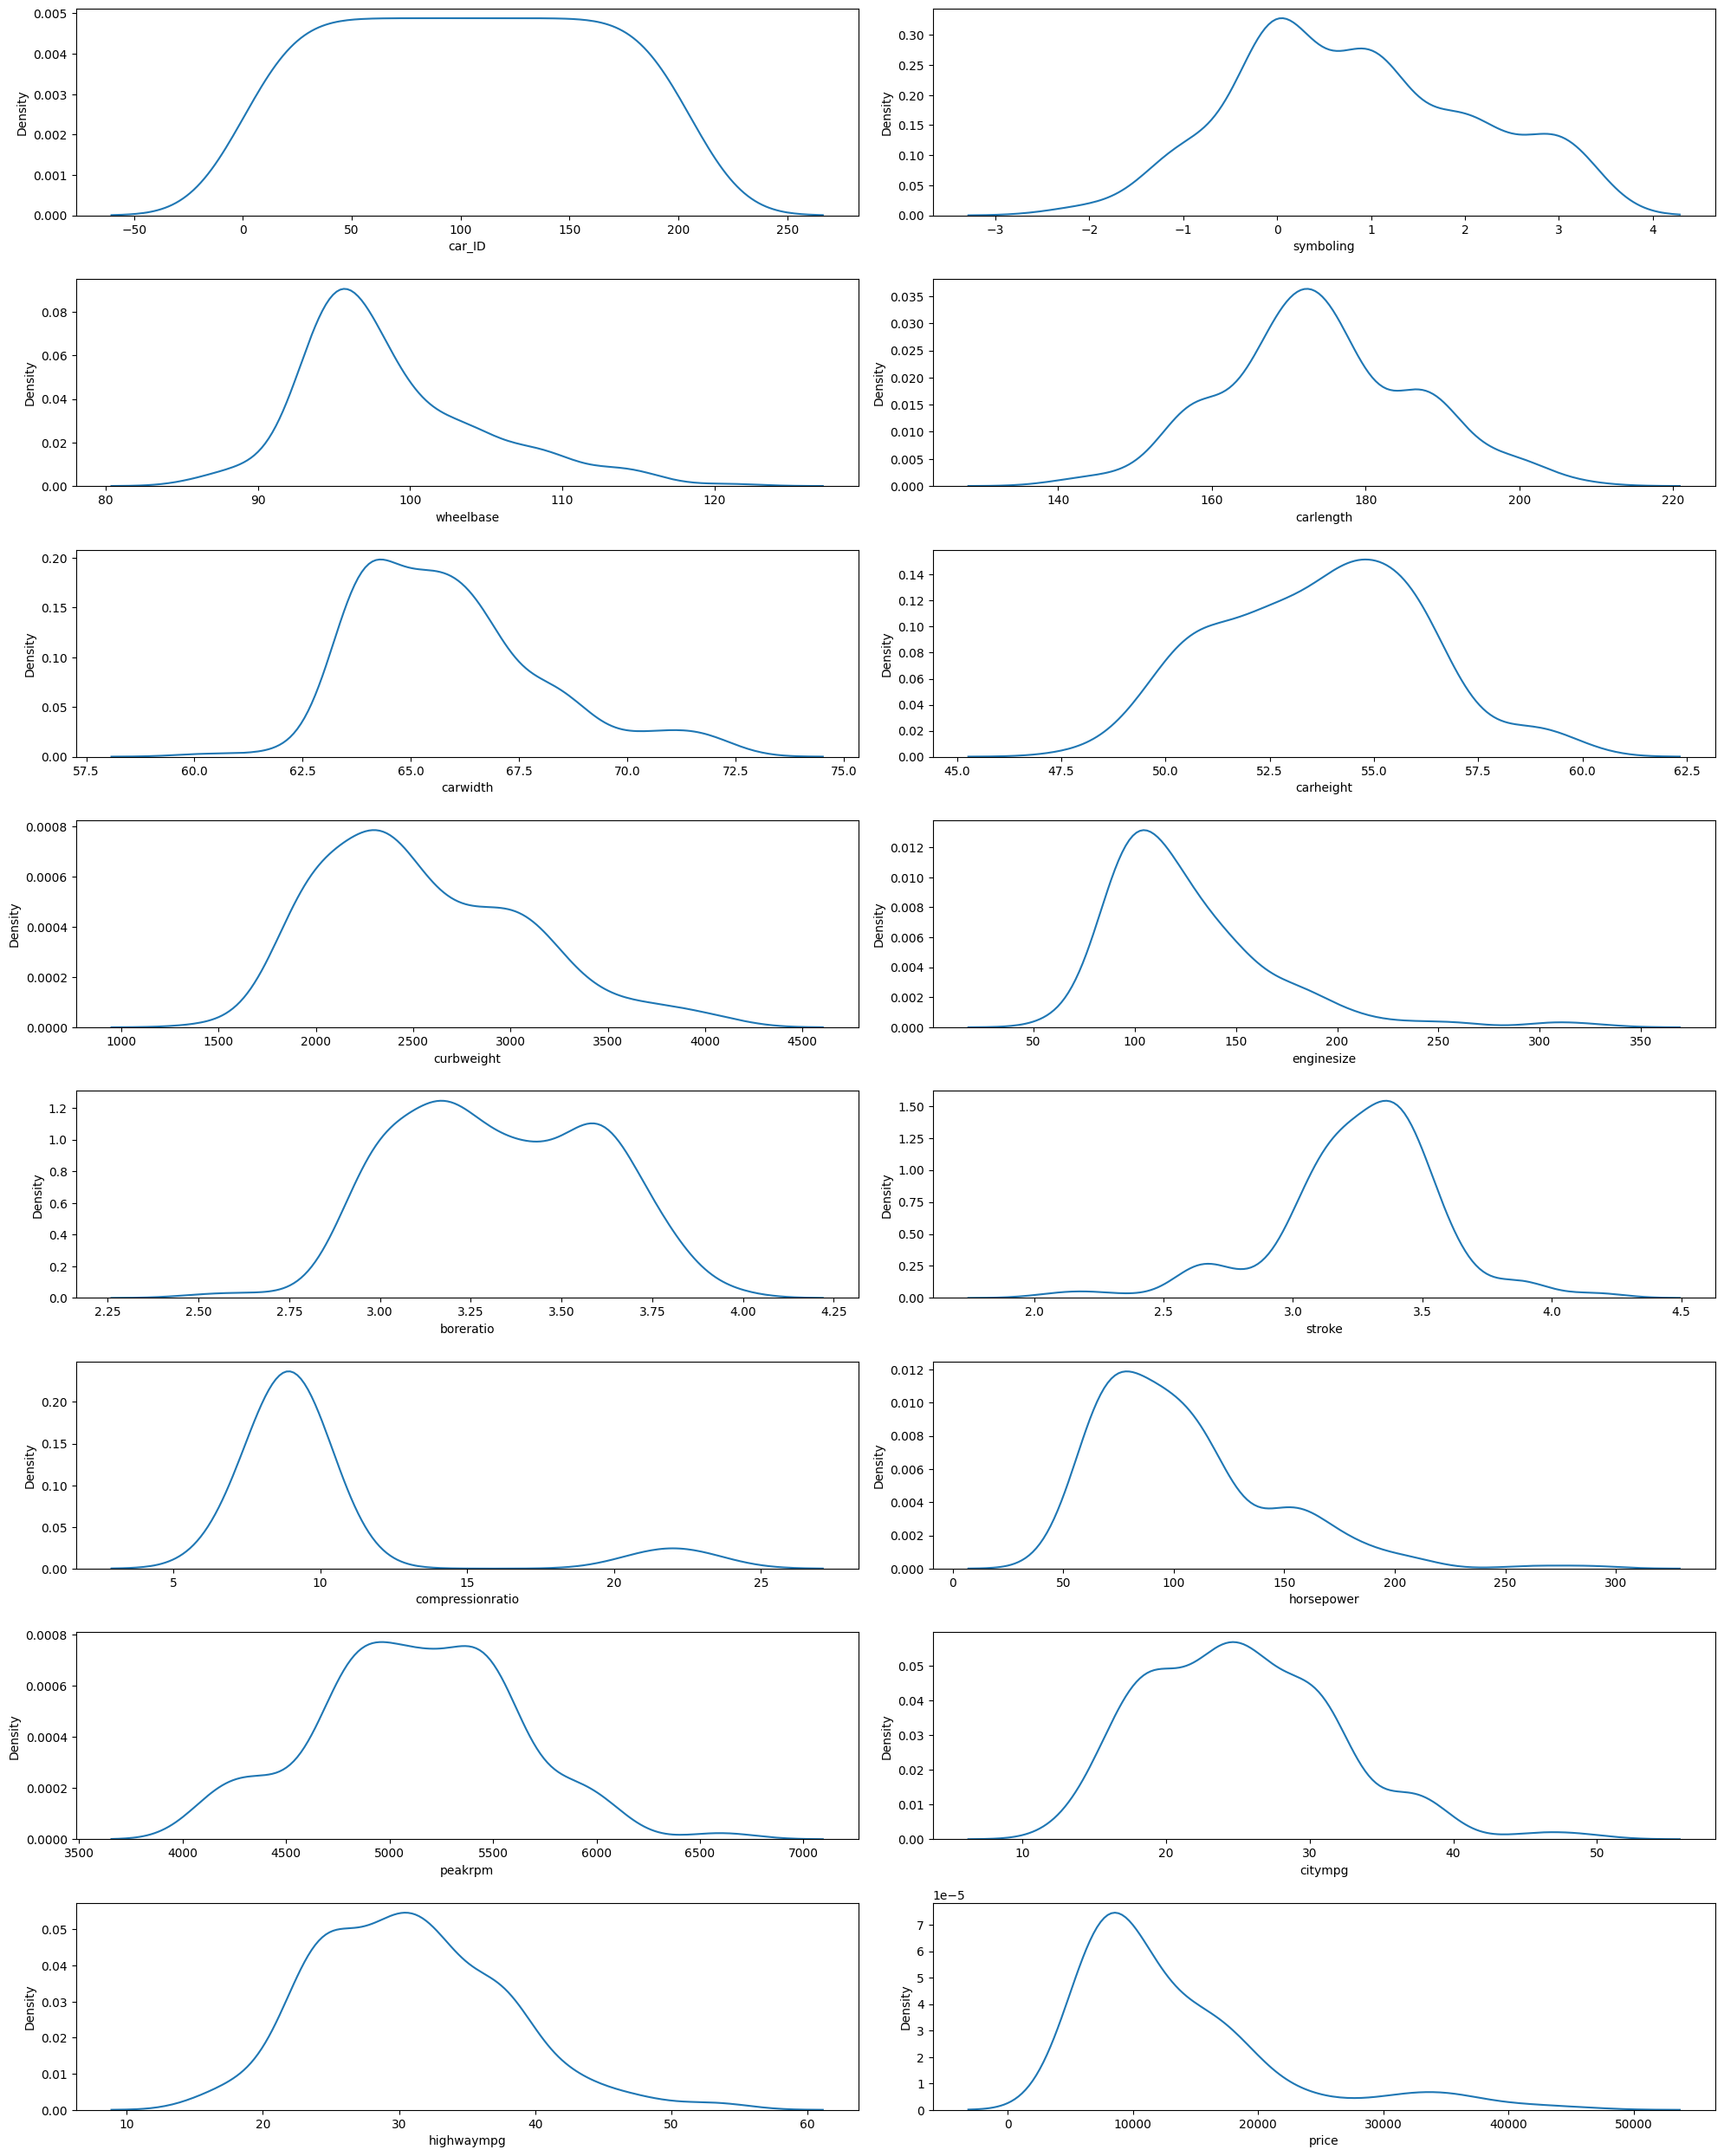

In [9]:
fig,ax=plt.subplots(8,2,figsize=(20,25))
ax=ax.flatten()
i=0
for col in not_cat_cols:
    sns.kdeplot(data=df,x=col,ax=ax[i])
    i+=1
plt.tight_layout()
plt.show()

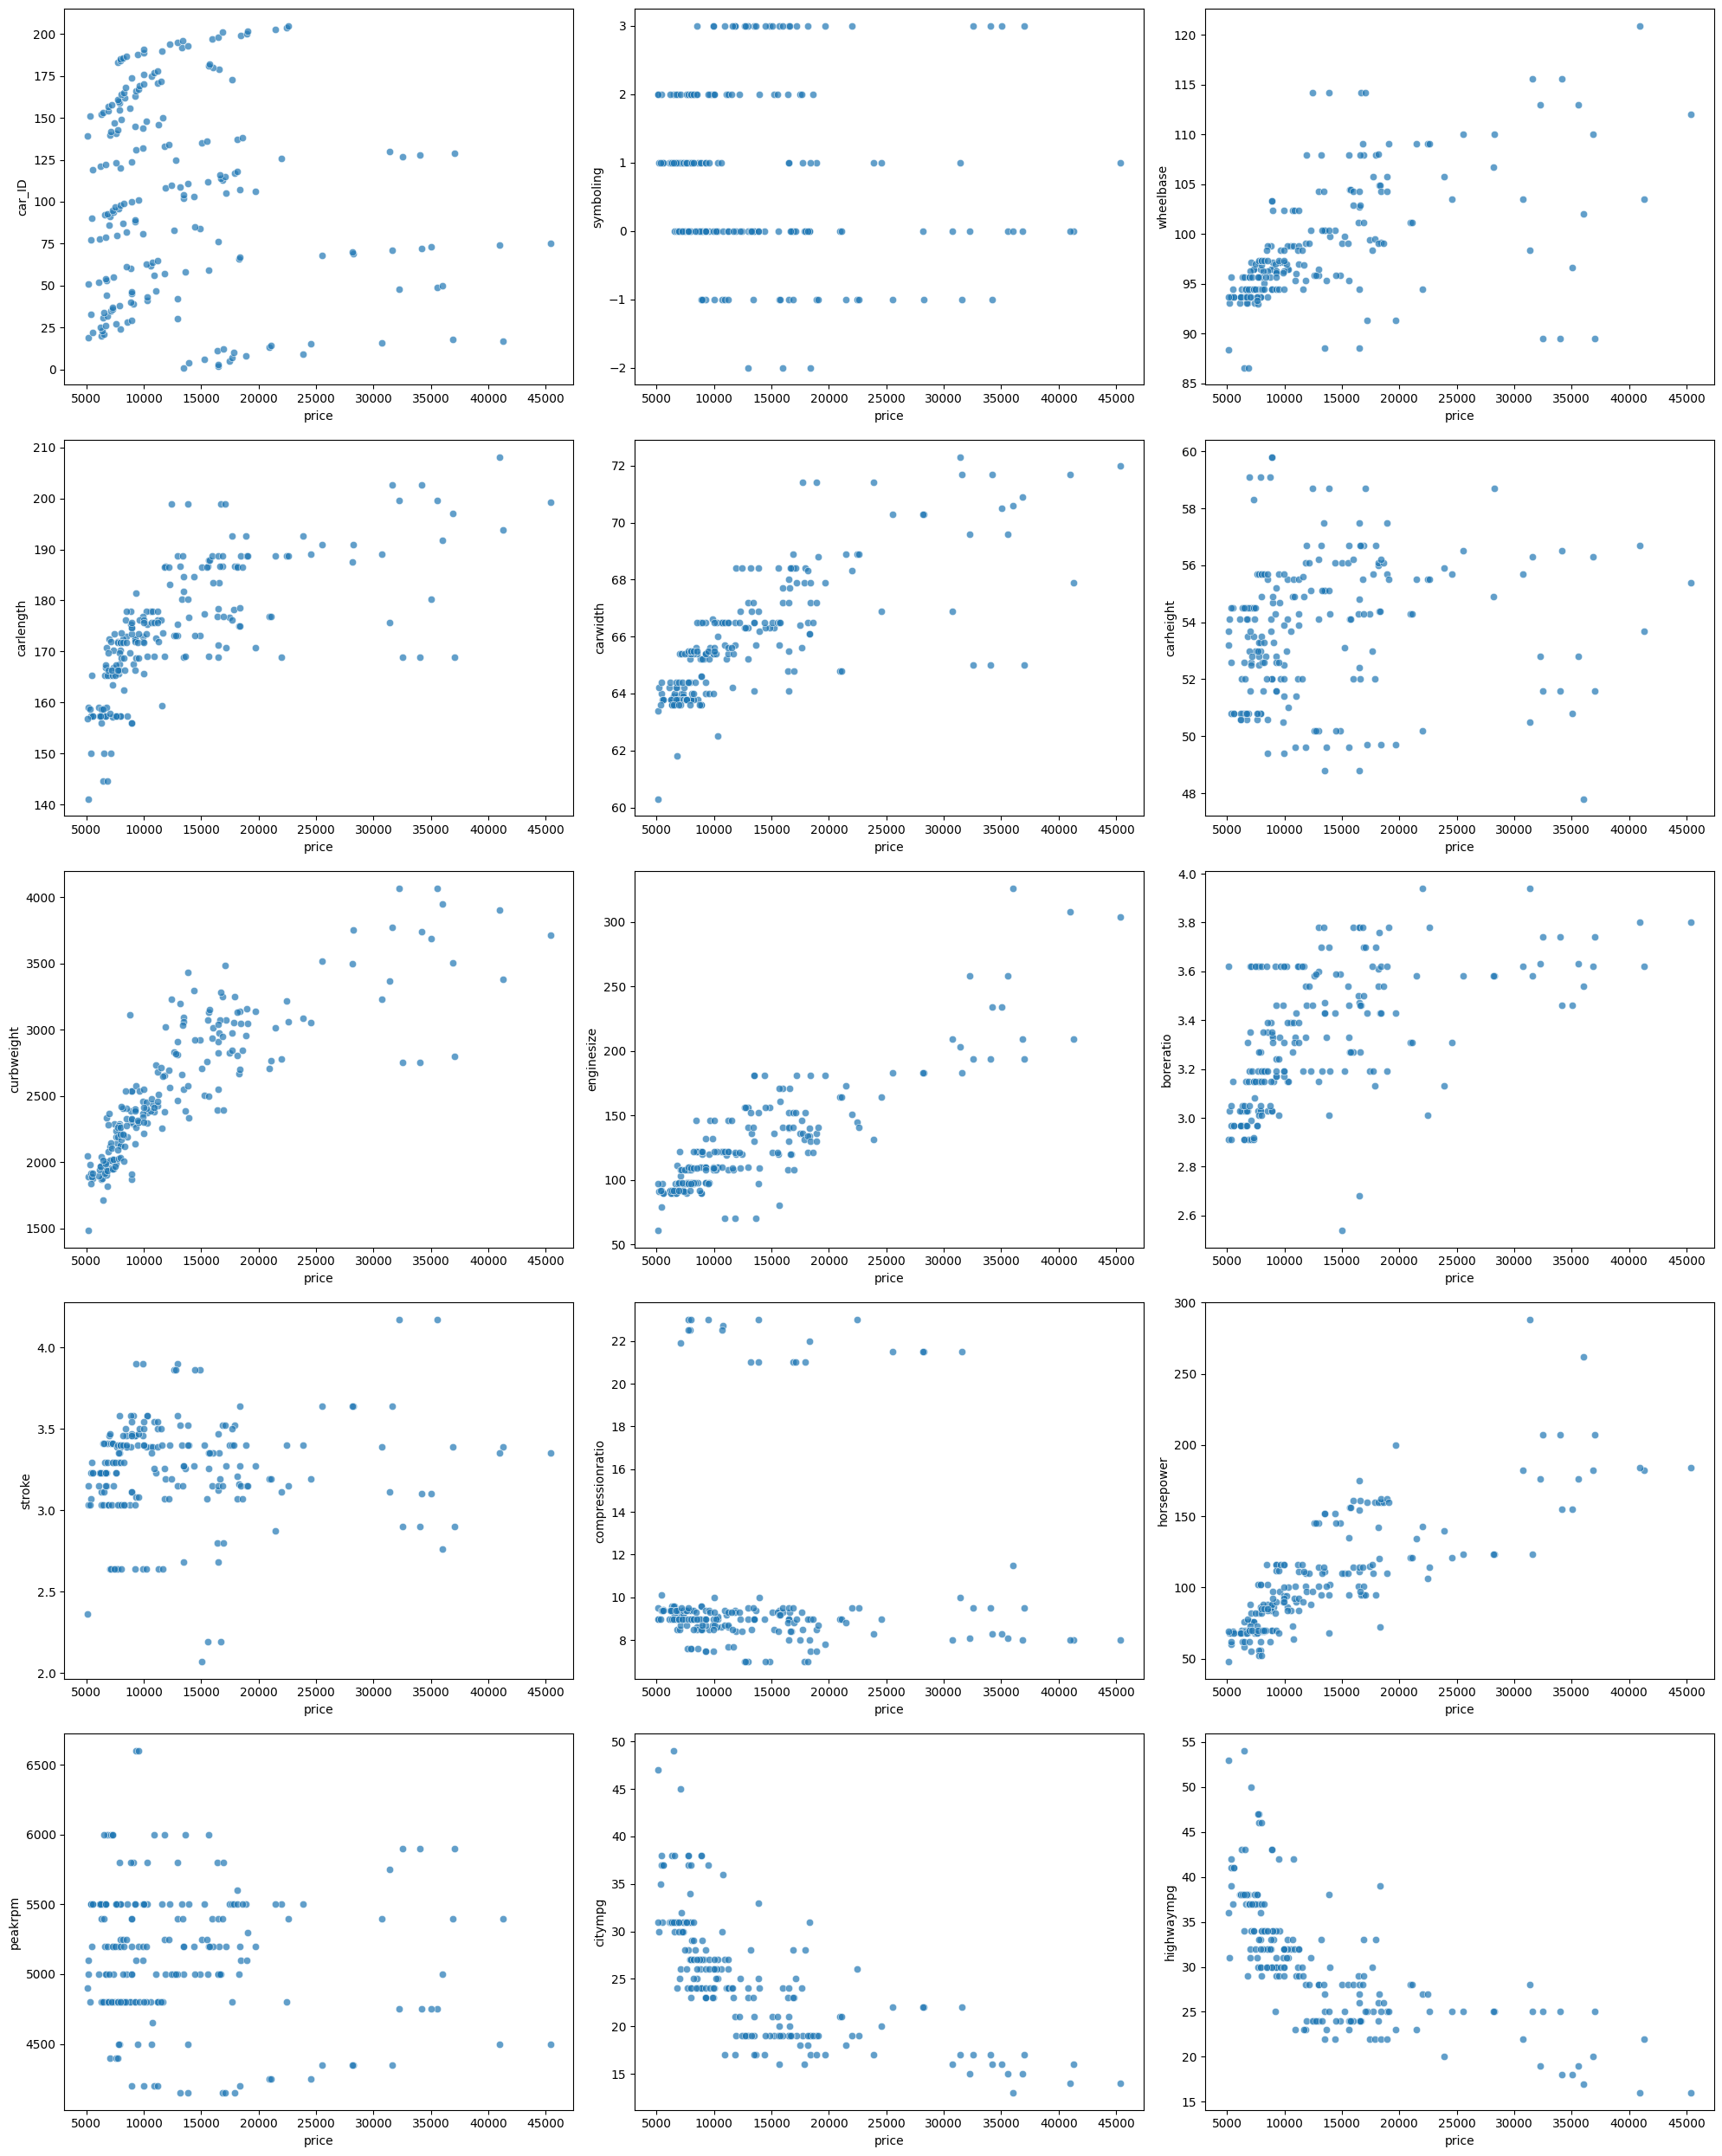

In [10]:
# numerical columns against the target variable to understand the data
fig,ax=plt.subplots(5,3,figsize=(20,25))
ax=ax.flatten()
i=0
for col in not_cat_cols:
    if col !='price':
        sns.scatterplot(data=df,x='price',y=col,ax=ax[i],alpha=0.7)
        i+=1
plt.tight_layout()
plt.show()

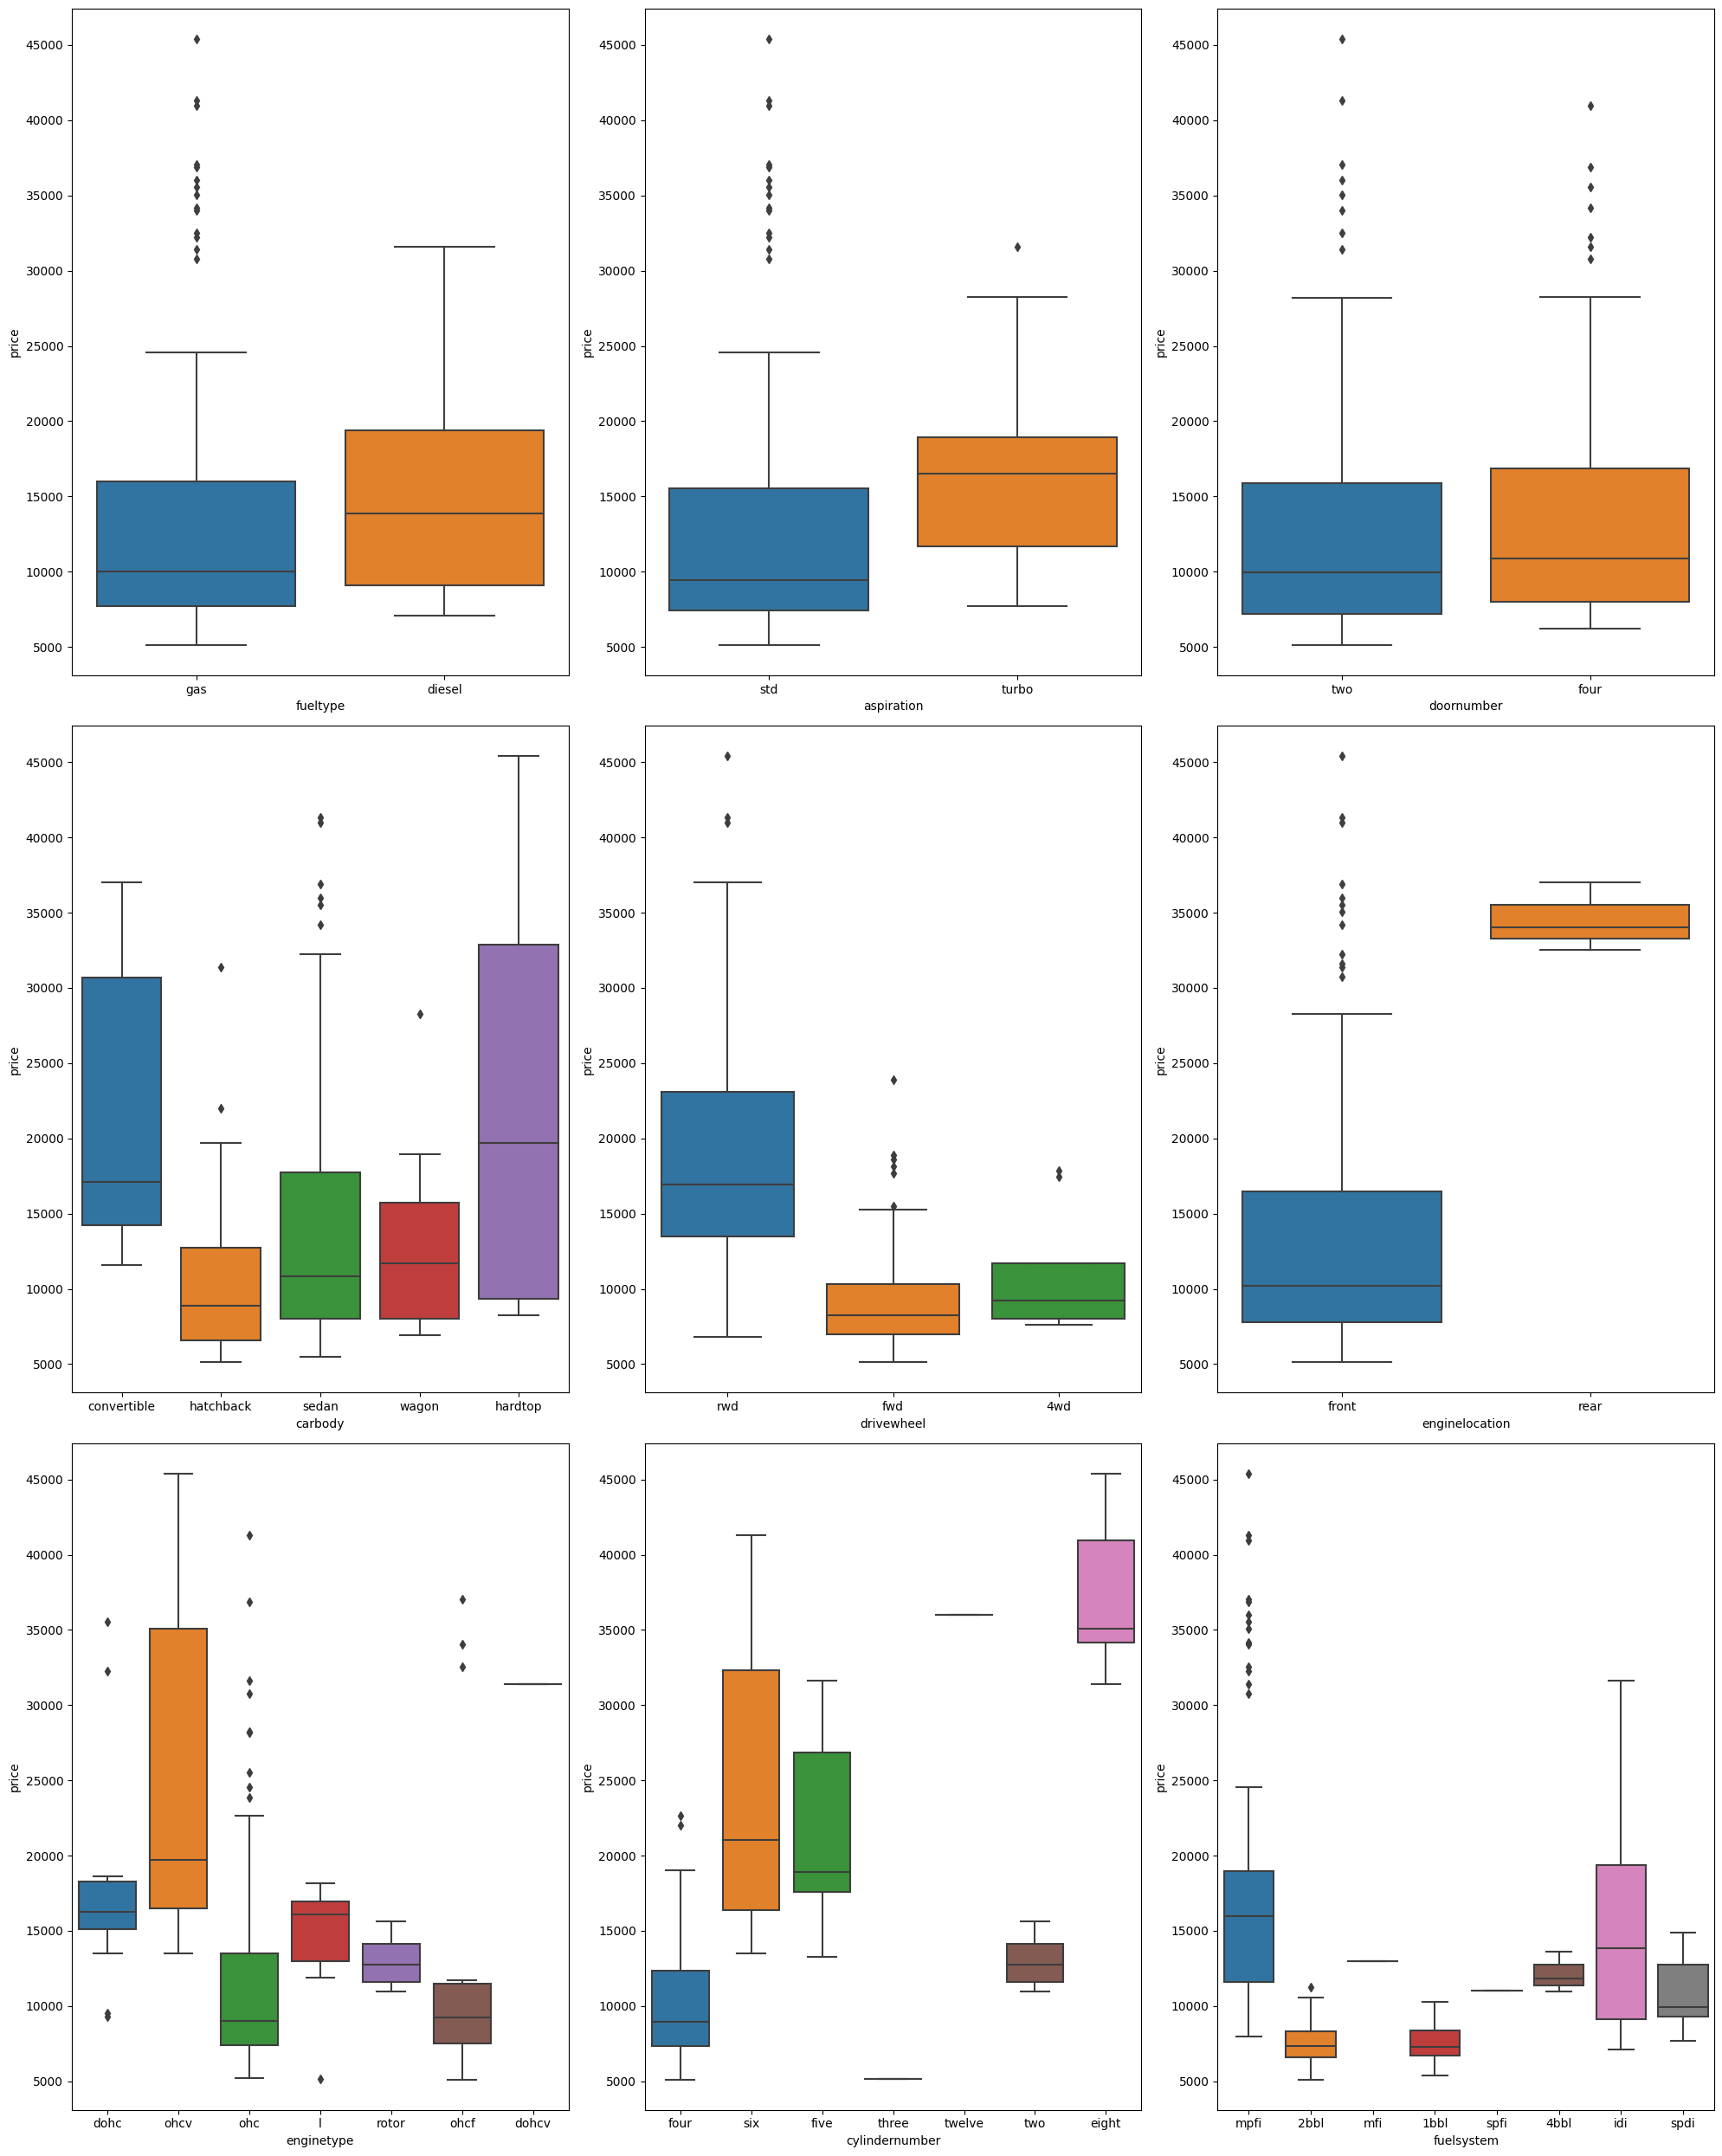

In [11]:
# cateogrical columns against the target variable to understand the data
fig,ax=plt.subplots(3,3,figsize=(20,25))
ax=ax.flatten()
i=0
for col in cat_cols:
    if col!='CarName': # wont be able to plot as it takes a lot of space
        sns.boxplot(data=df,y='price',x=col,ax=ax[i])
        i+=1
plt.tight_layout()
plt.show()

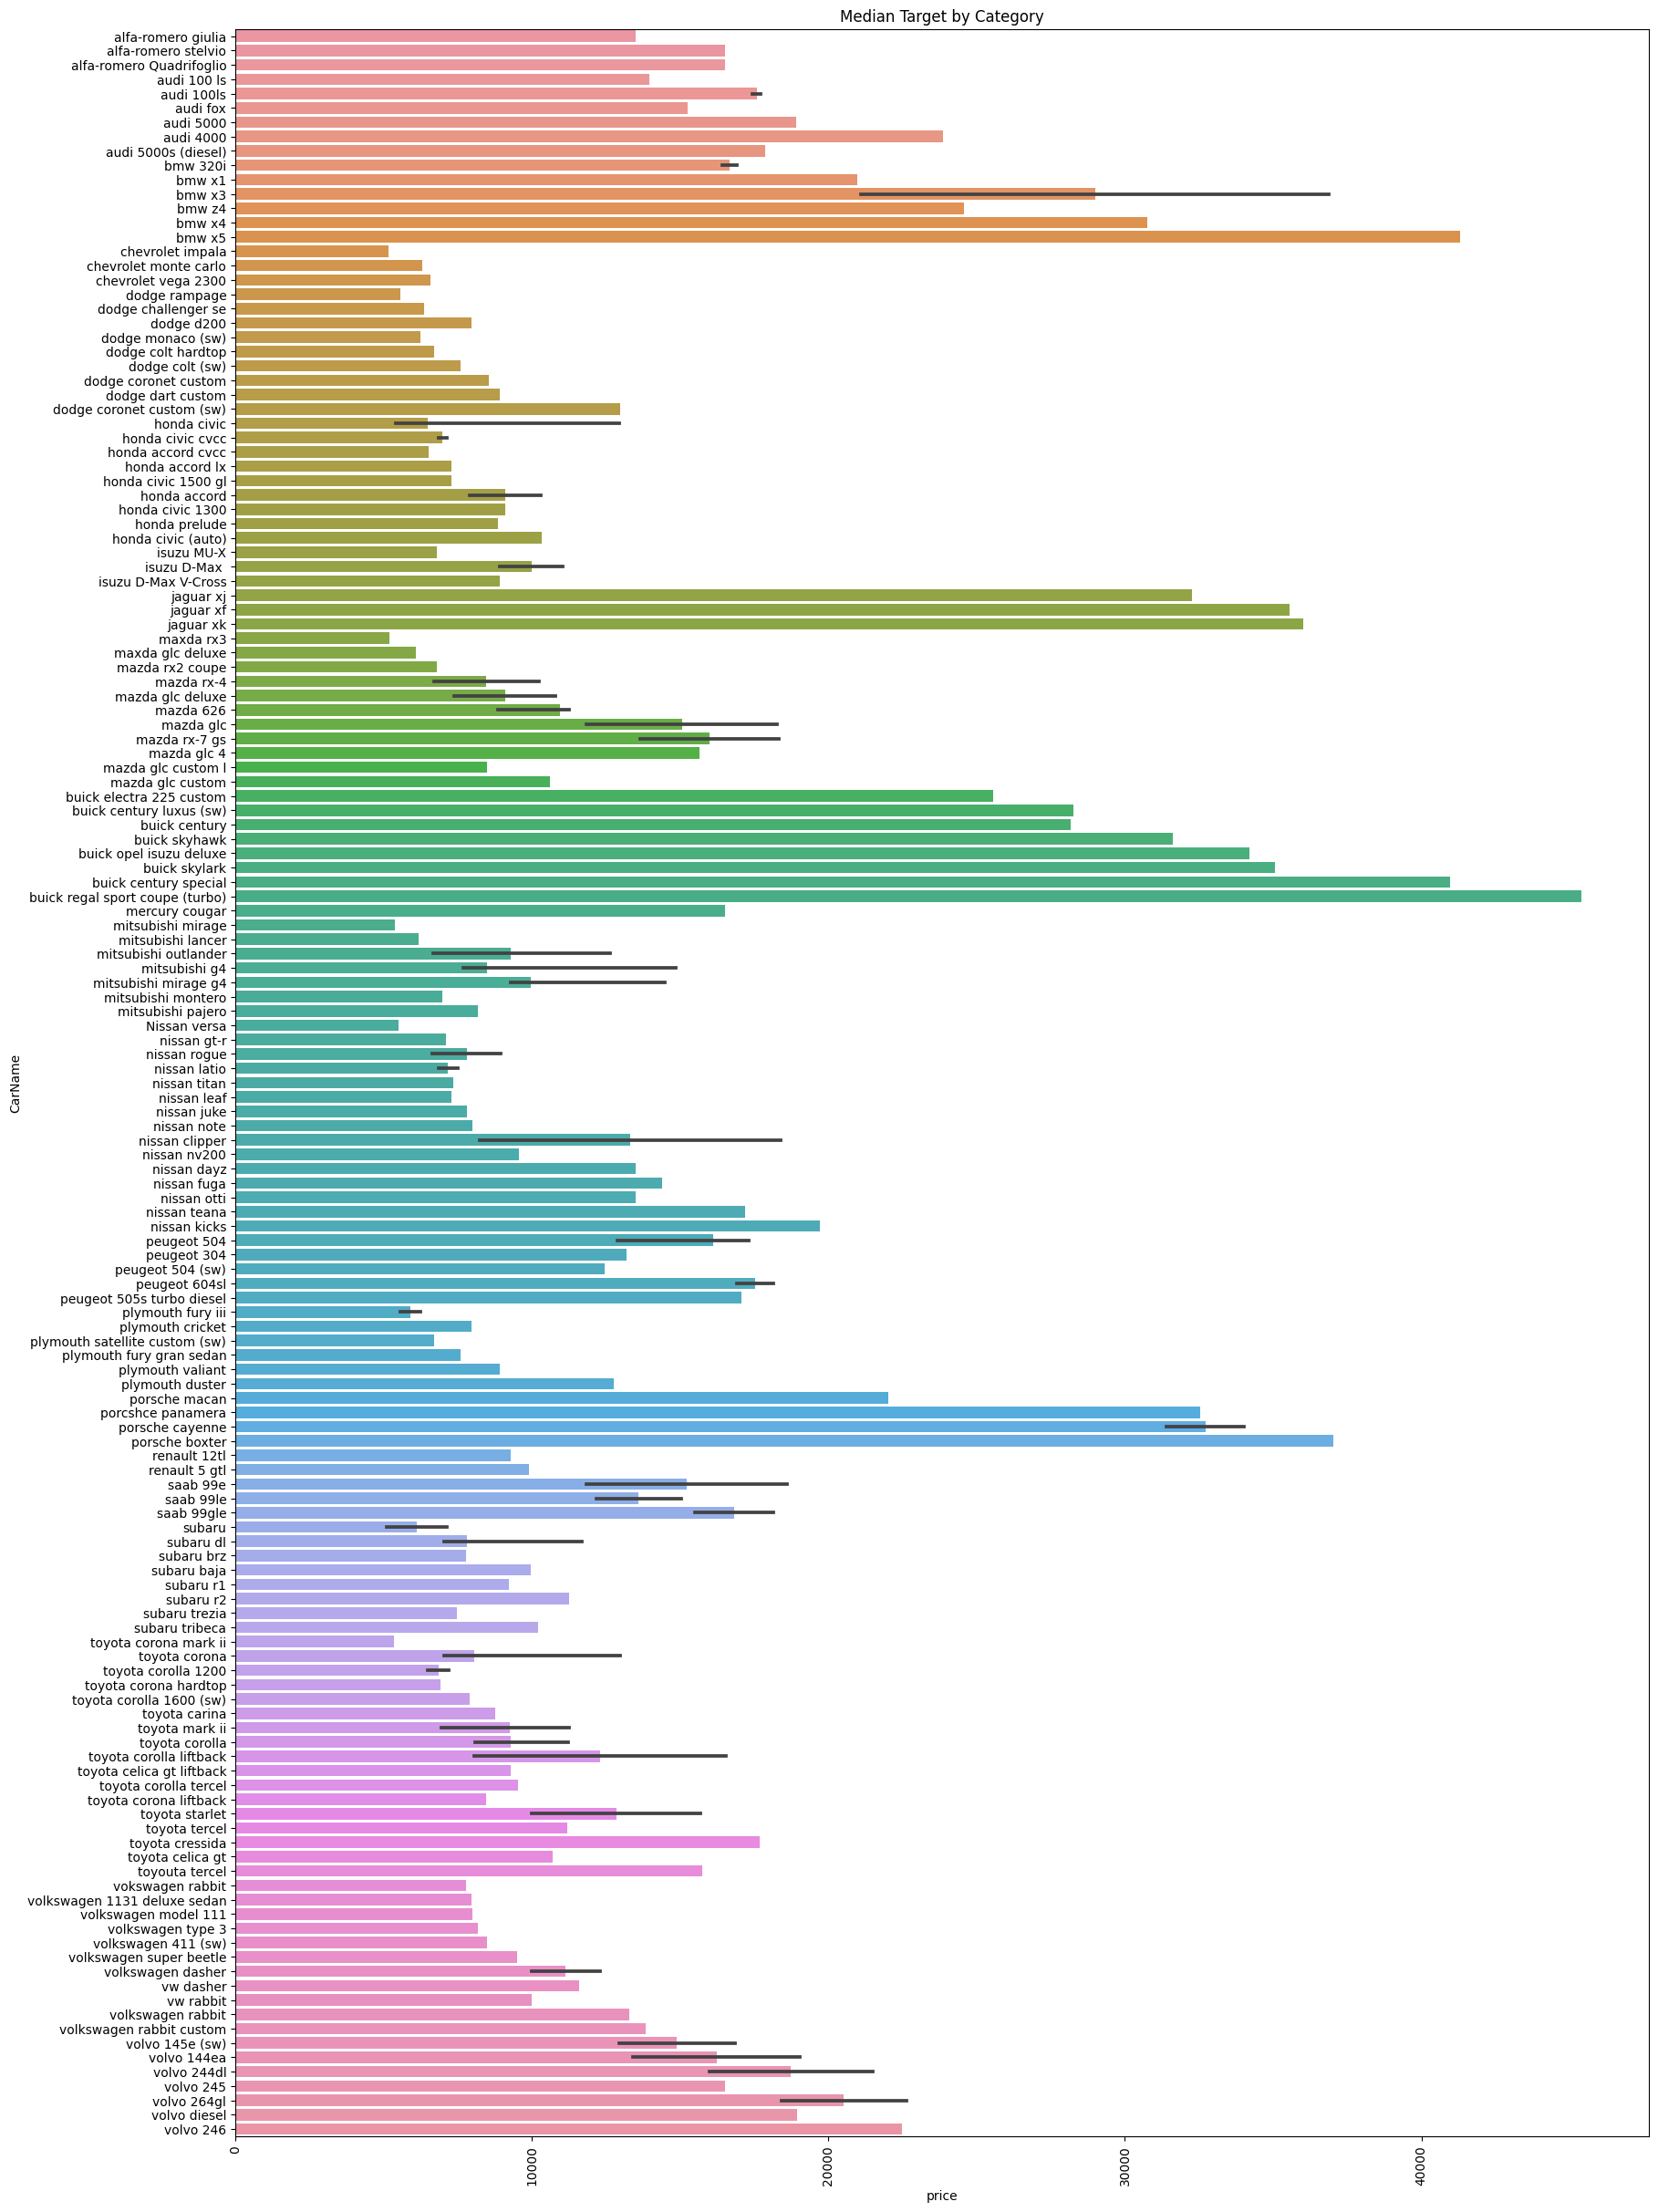

In [12]:
plt.figure(figsize=(20, 30))
sns.barplot(y='CarName', x='price', data=df, estimator=np.median)
plt.xticks(rotation=90)
plt.title('Median Target by Category')
plt.show()

In [13]:
# let us take in the cat_cols and convert it into the numerical datatype using target encoding
cat_cols = df.columns[df.dtypes == 'object']
target = 'price'
for col in cat_cols:
    target_mean = df.groupby(col)[target].mean()
    df[col + '_enc'] = df[col].map(target_mean)
    df.drop(col,inplace=True,axis=1)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   car_ID              205 non-null    int64  
 1   symboling           205 non-null    int64  
 2   wheelbase           205 non-null    float64
 3   carlength           205 non-null    float64
 4   carwidth            205 non-null    float64
 5   carheight           205 non-null    float64
 6   curbweight          205 non-null    int64  
 7   enginesize          205 non-null    int64  
 8   boreratio           205 non-null    float64
 9   stroke              205 non-null    float64
 10  compressionratio    205 non-null    float64
 11  horsepower          205 non-null    int64  
 12  peakrpm             205 non-null    int64  
 13  citympg             205 non-null    int64  
 14  highwaympg          205 non-null    int64  
 15  price               205 non-null    float64
 16  CarName_

# Feature Engineering

In [15]:
# importing
from sklearn.feature_selection import mutual_info_regression

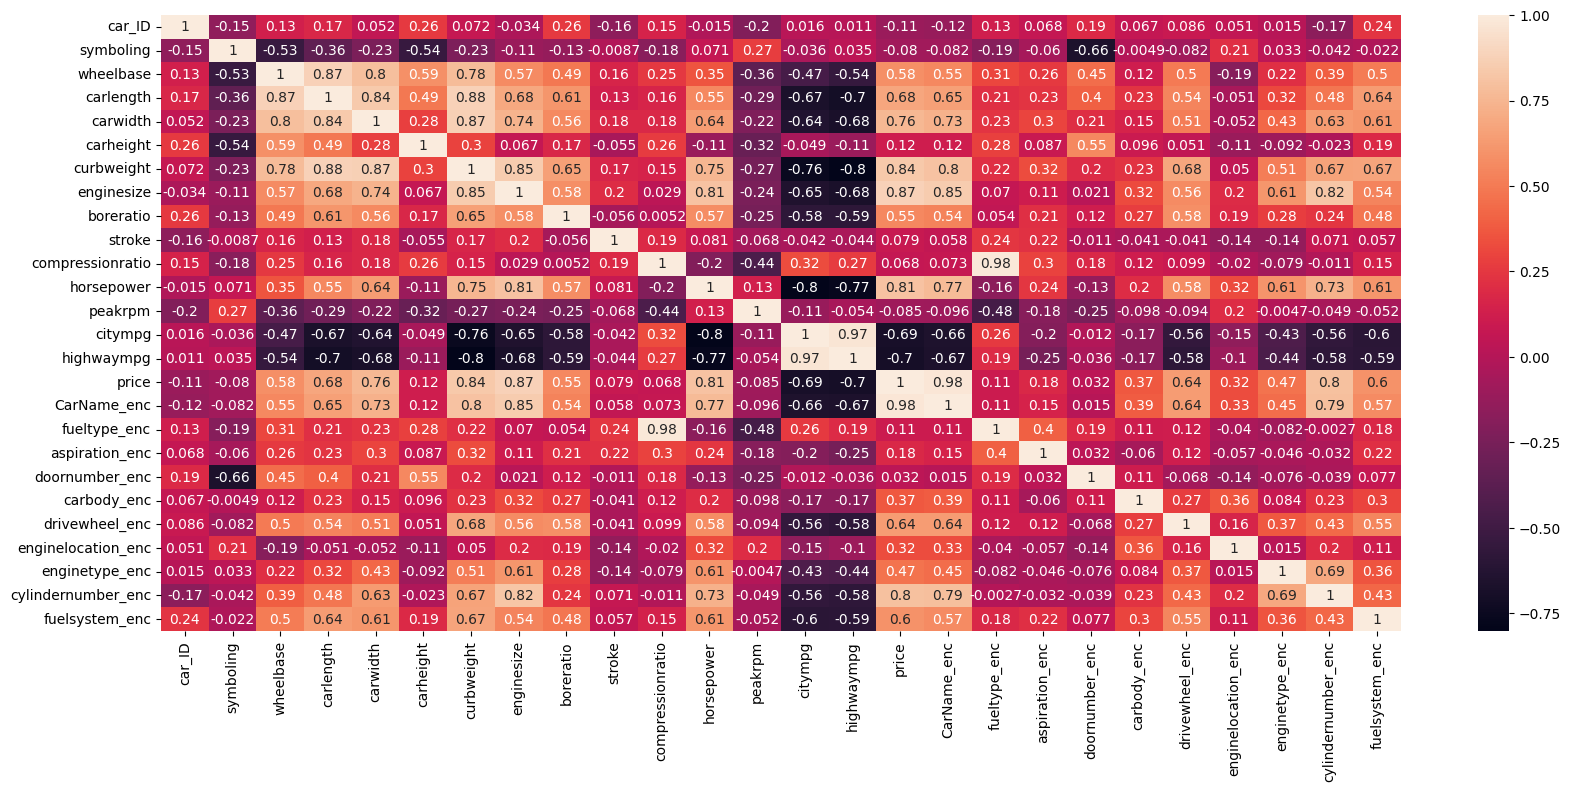

In [16]:
# Let us plot the correlation using a heatmap
# after this we can calculate the mutual information and plotting it using a bar plot

plt.figure(figsize=(20,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

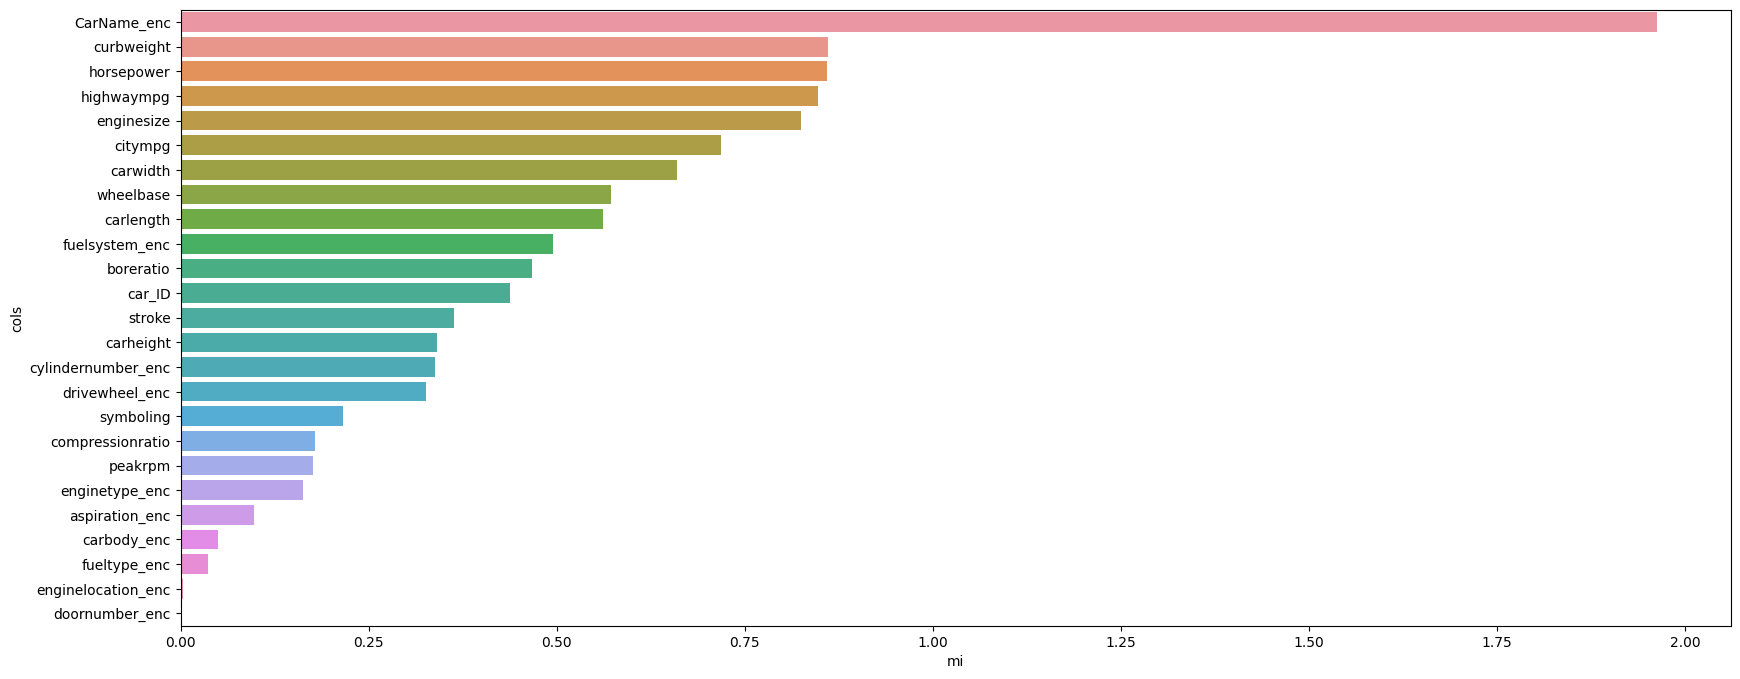

In [17]:
# calculating mutual information
x=df.drop(columns='price')
y=df['price']

mi=mutual_info_regression(x,y)
mi_df=pd.DataFrame({'cols':x.columns,'mi':mi})
mi_df.sort_values(inplace=True,by='mi',ascending=False)

plt.figure(figsize=(20,8))
sns.barplot(data=mi_df,y='cols',x='mi')
plt.show()

*Let us not create any feature right now as we have enough features which are highly correlated*

# Data Preparation

In [18]:
# importing
from sklearn.model_selection import train_test_split

In [19]:
df['price'] = np.log1p(df['price'])
x=df.drop(columns='price')
y=df['price']

xt,xte,yt,yte=train_test_split(x,y,random_state=20,test_size=0.2)

In [20]:
print(xt.shape,xte.shape,yt.shape,yte.shape)

(164, 25) (41, 25) (164,) (41,)


# Model

In [21]:
# importing

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error

In [22]:
rf_xt=xt.copy()
rf_xte=xte.copy()
rf_yt=yt.copy()
rf_yte=yte.copy()
rf=RandomForestRegressor()
param={'criterion':['squared_error','poisson'],'min_samples_split':list(np.arange(2,101)),'min_samples_leaf':list(np.arange(1,101)),
       'max_features':['sqrt','log2',None],'n_estimators':[1000],'max_depth':list(np.arange(1,101))}
nrf=RandomizedSearchCV(rf,param_distributions=param,cv=10,n_jobs=-1,random_state=20,scoring='r2')
nrf.fit(rf_xt,rf_yt)
print(nrf.best_params_)
print(nrf.best_score_)
nrf=nrf.best_estimator_

{'n_estimators': 1000, 'min_samples_split': 44, 'min_samples_leaf': 20, 'max_features': None, 'max_depth': 35, 'criterion': 'squared_error'}
0.7852384417581943


# Prediction and Evaluation Metrics

In [23]:
pred_t=nrf.predict(rf_xt)
pred=nrf.predict(rf_xte)

In [24]:
print("Training r2_score and mean squared error:\n")
print(r2_score(rf_yt,pred_t))
print(mean_squared_error(rf_yt,pred_t))

Training r2_score and mean squared error:

0.8590534962352279
0.038001718775044206


In [25]:
print("Testing r2_score and mean squared error:\n")
print(r2_score(rf_yte,pred))
print(mean_squared_error(rf_yte,pred))

Testing r2_score and mean squared error:

0.8916483467505599
0.01845088357379879


# Residual Graph

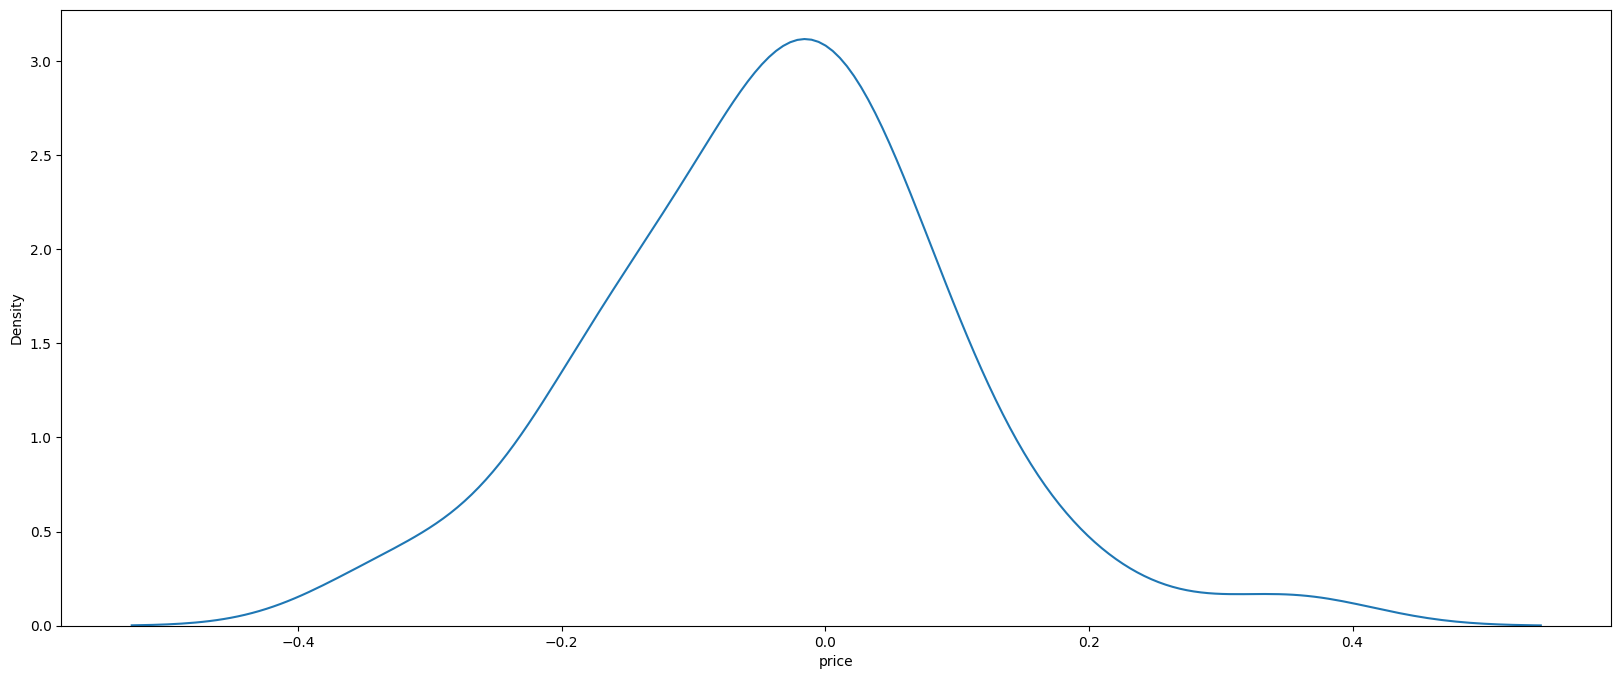

In [26]:
plt.figure(figsize=(20,8))
sns.kdeplot(rf_yte-pred)
plt.show()